# Nordpool data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('elspot.csv')

In [5]:
d.timestr = pd.to_datetime(d.timestr)

In [6]:
d.datestr = pd.to_datetime(d.datestr)

# Descriptives

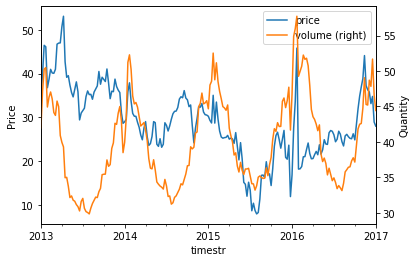

In [16]:
ax = d.groupby(pd.Grouper(key='timestr', freq='w'))[['price','volume']].mean().plot(secondary_y=['volume']); 
ax.right_ax.set_ylabel('Quantity');
ax.set_ylabel('Price');

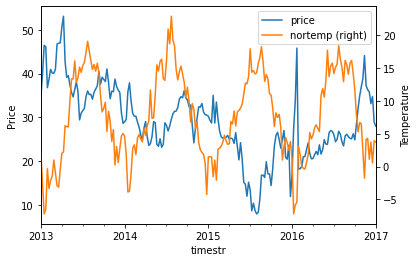

In [58]:
ax = d.groupby(pd.Grouper(key='timestr', freq='w'))[['price','nortemp']].mean().plot(secondary_y=['nortemp']); 
ax.set_ylabel('Price'); 
ax.right_ax.set_ylabel('Temperature'); 

# Regression

In [19]:
N = d.shape[0]

In [21]:
X = np.stack([np.ones((N,)), d.price.values], axis=1)
Y = d.volume.values[:, np.newaxis]

In [53]:
betahat = np.linalg.inv(X.T @ X) @ X.T @ Y

pd.DataFrame(betahat, index=['Constant','price'], columns=['betahat'])

,betahat
Constant,32.842381
price,0.248174


In [54]:
X = np.stack([np.ones((N,)),  d.price.values, d.nortemp.values], axis=1)
Y = d.volume.values[:, np.newaxis]

betahat = np.linalg.inv(X.T @ X) @ X.T @ Y

pd.DataFrame(betahat, index=['Constant','price','nortemp'], columns=['betahat'])

,betahat
Constant,41.861661
price,0.113893
nortemp,-0.661055
